<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap_9_Deep_learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name='section_9'></a>
# 9.<font color="Crimson">Pytorch and Deep learning basics</font>

　Deep learning is a machine learning technique that mimics the mechanism of human neurons and is characterized by the use of multi-layered networks.

　In the previous lectures, we mainly learned about machine learning using **scikit-learn**, but from this lecture, we will challenge image recognition and various real-world problems using the deep learning (Deep Learning) library **Pytorch**.


**Goals of this lecture**:
- 1. learn the basics of Pytorch
- 2. learn differential and gradient descent.


## <font color="Crimson">**Preparation**</font>

　From this lecture, we will use GPUs to improve computational efficiency. First, we need to prepare an environment where GPUs can be used. To use a GPU with **Colab**, change the settings and reconnect as shown in the following figure.(Change the type of runtime).

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=1ReWA-KRP4nihDwBLn4hgnuWRCpy3_2DH&" width="100%">

**Figure 1. Use GPU**
</div>

## 9.1 <font color="Crimson">Basics of Tensors</font>

　First we will introduce **Tensors**, a new data type handled by **Pytorch**. A **Tensor** can be an array of any dimension, a single number is called a **0th-order** tensor, a vector is called a **1st-order** tensor, a matrix is called a **2nd-order** tensor, and a three-dimensional is called a **3rd-order** tensor. In **Pytorch**, you can use ``torch.tensor`` to handle tensors, and the basic usage is similar to **numpy**.



In [ ]:
import torch
# zeroth rank Tensor
display(torch.tensor(2) )

# 1st rank Tensor
display(torch.tensor([1,2,3]))

# 2nd rank Tensor
display(torch.tensor([[1,2], [3, 4]]))

tensor(2)

tensor([1, 2, 3])

tensor([[1, 2],
        [3, 4]])

One of the features of **Tensor** handled by **Pytorch** is that it is very compatible with the **numpy** library, and many functions handled by **numpy** can be used as well.

In [ ]:
import numpy as np

# Numpy and Tensor

a = np.array([1,2,3]) # numpy
b = torch.from_numpy(a) #convert from numpy
c = b.numpy() # convert from tensor
print(a,'\n', b,'\n', c)

[1 2 3] 
 tensor([1, 2, 3]) 
 [1 2 3]


- Basic usage

Tensor has many similar functions to the numpy.

In [ ]:
# 1st rank Tensor
a = torch.tensor([1.,2.,3.,4.,5.,6.])
display(torch.sum(a))
display(a.sum())
display(torch.mean(a))
display(a.mean())

# 2nd rank Tensor
b = torch.tensor([[1.,2.,3.],[4.,5.,6.]])
display(b)
display(torch.sum(b))
display(torch.sum(b, axis=0))
display(b.sum())
display(b.sum(axis=0))

display(torch.mean(b))
display(torch.mean(b, axis=0))
display(b.mean())
display(b.mean(axis=0))

tensor(21.)

tensor(21.)

tensor(3.5000)

tensor(3.5000)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor(21.)

tensor([5., 7., 9.])

tensor(21.)

tensor([5., 7., 9.])

tensor(3.5000)

tensor([2.5000, 3.5000, 4.5000])

tensor(3.5000)

tensor([2.5000, 3.5000, 4.5000])

In [ ]:
# Create Tensor
import torch
import numpy as np
# Zero matrix
display( torch.zeros(2,2) )

# Diagonal matrix
display( torch.eye(2) )

# random values from 0-1
tmp1 = torch.rand(10)
display( tmp1)

# Change the dimension with view, you can also use reshape
tmp2 = tmp1.view(2, -1) # reshape
display(tmp2)

# Confirm data size
display(tmp2.shape) # tmp2.size()

tensor([[0., 0.],
        [0., 0.]])

tensor([[1., 0.],
        [0., 1.]])

tensor([0.1992, 0.3735, 0.1700, 0.9936, 0.3825, 0.8430, 0.0295, 0.1443, 0.5411,
        0.6536])

tensor([[0.1992, 0.3735, 0.1700, 0.9936, 0.3825],
        [0.8430, 0.0295, 0.1443, 0.5411, 0.6536]])

torch.Size([2, 5])

There are many other uses, but the rest will be explained additionally when you actually use it.

　Second, you can use ``to('cuda')`` to perform tensor-to-tensor calculations on the GPU.

In [ ]:
import torch

a = torch.tensor([1,2,3])
b = torch.tensor([3,5,7])

# Inner product
print(a.dot(b))

# Inner product using GPU
c = torch.tensor([1.,2.,3.]).to('cuda')
d = torch.tensor([3.,5.,7.]).to('cuda')

print(c.dot(d))

tensor(34)
tensor(34., device='cuda:0')


Note that the inner product of $a$ and $b$ is calculated on the CPU and the inner product of $c$ and $d$ is calculated on the GPU; it cannot be calculated between data passed to the CPU and data passed to the GPU.

In [ ]:
# Calculations between different devices will produce errors
#a.dot(c)

<font color='crimson'>Simple Tips<font>

　Now, you can choose CPU or GPU for the actual calculation and unify them by programming as follows




In [ ]:
def calculation(x,y, device='cpu'):
  x = x.to(device)
  y = y.to(device)
  return x.dot(y)

device1 = 'cpu'
device2 = 'cuda'
print( calculation(a, b, device1) )
print( calculation(c, d, device2) )

tensor(34)
tensor(34., device='cuda:0')


## 9.2. <font color="Crimson">differential calculus</font>





We will then briefly discuss another important aspect of deep learning: differential calculus.

The differential calculus $f'(x)$ of the function $f(x)$ can be written as

<br><br>
$$
f'(x)=\lim_{h \to +0}\frac{f(x+h)-f(x)}{h} \tag{1}
$$

However, **Pytorch** does not perform derivative calculations at the mathematical level (e.g., differentiating $y=x^2$ yields $y'=2x$), but actually assigns a very small number (e.g., 1e-6) to $h$ and uses numerical calculations to obtain an approximation. Such a method is called **numerical differentiation**, not equation (1),

<br><br>
$$
f'(x)\fallingdotseq \frac{f(x+h)-f(x-h)} {2h} \tag{2}
$$
<br>

to compute approximate values.

Numerical differentiation is implemented in **Pytorch**. To compute the numerical differential,

- 1) When creating a tensor, define it with ``requires_grad=True``.

- 2) The tensor created in 1) is substituted into the function as input data and the output value $y$ is calculated.

- 3) The numerical differential in **Pytorch** requires the final value to be a scalar. Therefore, if the output is a vector, use ``z=y.sum()`` to create a scalar output $z$. This is not necessary if $y$ is a scalar.

- 4) Numerical differentiation (gradient calculation) is performed with `z.backward()`.

- 5) The gradient value is stored in ``grad`` for each variable (``x.grad`` for ``x``)


Now let's look at the $y=x^2$ example to create a function of numerical differentiation.

In [ ]:
# 1. requires_grad=True, it will calculate differential calculus for this variable
x = torch.tensor(1.5, requires_grad=True)

# 2. y = x^2
y = x ** 2

# 4. Use backward to calculate the differential
y.backward()

# 4. show the grade
x.grad

tensor(3.)

- gradient values for multiple inputs

In [ ]:
import torch

# 1 define x
x = torch.arange(-5, 5, 0.1, dtype=torch.float32, requires_grad=True)

# 2 calculate y
y = x ** 2

# 3 Summry to a scalar
# Note that the final part should be scalar, so you need to make sum for y.
z = y.mean()

# 4. backward
z.backward()

# 5. x.grad
x.grad

tensor([-1.0000e-01, -9.8000e-02, -9.6000e-02, -9.4000e-02, -9.2000e-02,
        -9.0000e-02, -8.8000e-02, -8.6000e-02, -8.4000e-02, -8.2000e-02,
        -8.0000e-02, -7.8000e-02, -7.6000e-02, -7.4000e-02, -7.2000e-02,
        -7.0000e-02, -6.8000e-02, -6.6000e-02, -6.4000e-02, -6.2000e-02,
        -6.0000e-02, -5.8000e-02, -5.6000e-02, -5.4000e-02, -5.2000e-02,
        -5.0000e-02, -4.8000e-02, -4.6000e-02, -4.4000e-02, -4.2000e-02,
        -4.0000e-02, -3.8000e-02, -3.6000e-02, -3.4000e-02, -3.2000e-02,
        -3.0000e-02, -2.8000e-02, -2.6000e-02, -2.4000e-02, -2.2000e-02,
        -2.0000e-02, -1.8000e-02, -1.6000e-02, -1.4000e-02, -1.2000e-02,
        -1.0000e-02, -8.0000e-03, -6.0000e-03, -4.0000e-03, -2.0000e-03,
        -5.9605e-11,  2.0000e-03,  4.0000e-03,  6.0000e-03,  8.0000e-03,
         1.0000e-02,  1.2000e-02,  1.4000e-02,  1.6000e-02,  1.8000e-02,
         2.0000e-02,  2.2000e-02,  2.4000e-02,  2.6000e-02,  2.8000e-02,
         3.0000e-02,  3.2000e-02,  3.4000e-02,  3.6

Let's visualize the f and f'.

In [ ]:
x.data

tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
        -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8

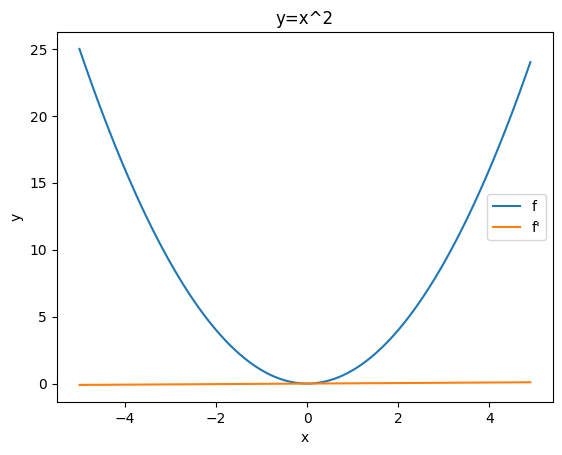

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x.data, y.data)
plt.plot(x.data, x.grad)
plt.legend(['f', 'f\''])
plt.title('y=x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As shown in this example, **pytorch** can automatically perform numerical differentiation and compute gradient values even for complex expressions, which is an essential feature for deep learning.Note that if you want to calculate the numerical differential again with $x$, you need to reset the gradient value to 0 once with ``grad.zero()``.

In [ ]:
print(x.grad)
x.grad.zero_()
print(x.grad)

tensor([-1.0000e+01, -9.8000e+00, -9.6000e+00, -9.4000e+00, -9.2000e+00,
        -9.0000e+00, -8.8000e+00, -8.6000e+00, -8.4000e+00, -8.2000e+00,
        -8.0000e+00, -7.8000e+00, -7.6000e+00, -7.4000e+00, -7.2000e+00,
        -7.0000e+00, -6.8000e+00, -6.6000e+00, -6.4000e+00, -6.2000e+00,
        -6.0000e+00, -5.8000e+00, -5.6000e+00, -5.4000e+00, -5.2000e+00,
        -5.0000e+00, -4.8000e+00, -4.6000e+00, -4.4000e+00, -4.2000e+00,
        -4.0000e+00, -3.8000e+00, -3.6000e+00, -3.4000e+00, -3.2000e+00,
        -3.0000e+00, -2.8000e+00, -2.6000e+00, -2.4000e+00, -2.2000e+00,
        -2.0000e+00, -1.8000e+00, -1.6000e+00, -1.4000e+00, -1.2000e+00,
        -1.0000e+00, -8.0000e-01, -6.0000e-01, -4.0000e-01, -2.0000e-01,
        -5.9605e-09,  2.0000e-01,  4.0000e-01,  6.0000e-01,  8.0000e-01,
         1.0000e+00,  1.2000e+00,  1.4000e+00,  1.6000e+00,  1.8000e+00,
         2.0000e+00,  2.2000e+00,  2.4000e+00,  2.6000e+00,  2.8000e+00,
         3.0000e+00,  3.2000e+00,  3.4000e+00,  3.6

If you want to calculate a gradient values for a numpy array, just convert it to tensor, and add `requires_grad_(True)` in the last part of the code.

### <font color='crimson'>**[Practice 1]Differential** (10 mins)</font>

Calculate the gradient values for the $y =- 3\cdot x^3 + 2\cdot x^2 - 10 \cdot x$ for the $x$ based on the values given below.

Then visualize the original function and the gradient values.

<details>

<summary> Hint 1 </summary>

- Convert the numpy array to a tensor (do not forget to add `require_grad_(True)`).

</details>

<details>
<summary> Hint 2 </summary>

- Define y function using the x. `y = -3 x **3 .....`.

</details>

<details>
<summary> Hint 3 </summary>

- Do not forget to convert the y to a scalar. e.g., `z = y.sum()`

</details>

In [ ]:
x = np.arange(-10, 10, 0.1)

# start here

# 1.
x = torch.from_numpy(x).requires_grad_(True)

y = -3 * x ** 3 + 2 * x ** 2 - 10 * x
z = y.sum()

z.backward()

x.grad

tensor([-950.0000, -931.6900, -913.5600, -895.6100, -877.8400, -860.2500,
        -842.8400, -825.6100, -808.5600, -791.6900, -775.0000, -758.4900,
        -742.1600, -726.0100, -710.0400, -694.2500, -678.6400, -663.2100,
        -647.9600, -632.8900, -618.0000, -603.2900, -588.7600, -574.4100,
        -560.2400, -546.2500, -532.4400, -518.8100, -505.3600, -492.0900,
        -479.0000, -466.0900, -453.3600, -440.8100, -428.4400, -416.2500,
        -404.2400, -392.4100, -380.7600, -369.2900, -358.0000, -346.8900,
        -335.9600, -325.2100, -314.6400, -304.2500, -294.0400, -284.0100,
        -274.1600, -264.4900, -255.0000, -245.6900, -236.5600, -227.6100,
        -218.8400, -210.2500, -201.8400, -193.6100, -185.5600, -177.6900,
        -170.0000, -162.4900, -155.1600, -148.0100, -141.0400, -134.2500,
        -127.6400, -121.2100, -114.9600, -108.8900, -103.0000,  -97.2900,
         -91.7600,  -86.4100,  -81.2400,  -76.2500,  -71.4400,  -66.8100,
         -62.3600,  -58.0900,  -54.000

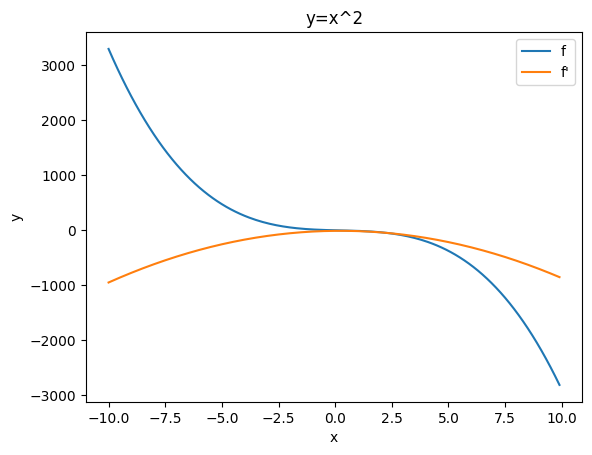

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x.data, y.data)
plt.plot(x.data, x.grad)
plt.legend(['f', 'f\''])
plt.title('y=x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 9.3<font color="Crimson">**Gradient Descent**</font>

The gradient descent or steepest descent method is an algorithm for finding the minimum or maximum of a function.It is also called the descent method.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=12Mhd3a_1YmrFcRzD7KsoVYAoJADytShd" width="80%">

**Figure 2 Gradient Descent**
</div>


After obtaining the gradient value, the next step is to show how to find the **minimum of the function**.The gradient descent method can be summarized simply as follows

- **Step 1**: initialize $x$ randomly.

- **Step 2**: Differentiate the function $f(x)$ and find the gradient(slope) value.
<br><br>

$$
g = f'(x) \tag{3}
$$
<br>
- **Step 3**: Update $x$ in the direction of the gradient using the gradient value.
<br><br>

$$
x^{(new)} = x^{(old)} - lr\times g \tag{4}
$$
<br>

- **Steps 1 through 3** are repeated a predetermined number of times or until the slope $g$ falls below a predetermined threshold $\epsilon$

The $lr$ in equation (4) is called the **learning rate** and is usually determined by the analyst in the range $0 < lr < 1$,

depending on the data, 0.1 ~ 0.0001 is often used(in my opinion).

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=12SnXNGTBAWOu9EAoaVozTgvgnjRHpZKh" width="80%">


**Figure 3 Learning Rate**
</div>

If the learning rate is not set properly, it will cause problems such as "it will not converge forever" or "it will take a huge amount of time to converge".

　Let's actually look at finding the minima of the quadratic function $y = x^2 + 3$.

**NOTE** that when you update new $x$ in step (4), you need to do this inside `with torch.no_grad()` as shown below.

In [ ]:
import torch

lr = torch.tensor(0.1)

# starting point
x = torch.tensor(1.5, requires_grad=True)

for epoch in range(30):
  # 1. forward
  y = x**2+3
  # 2. backward
  y.backward()


  print(y.data, x.data, x.grad)

  # 3. optimize x
  with torch.no_grad():
    x -= lr * x.grad

    # clear the grad
    x.grad.zero_()

tensor(5.2500) tensor(1.5000) tensor(3.)
tensor(4.4400) tensor(1.2000) tensor(2.4000)
tensor(3.9216) tensor(0.9600) tensor(1.9200)
tensor(3.5898) tensor(0.7680) tensor(1.5360)
tensor(3.3775) tensor(0.6144) tensor(1.2288)
tensor(3.2416) tensor(0.4915) tensor(0.9830)
tensor(3.1546) tensor(0.3932) tensor(0.7864)
tensor(3.0990) tensor(0.3146) tensor(0.6291)
tensor(3.0633) tensor(0.2517) tensor(0.5033)
tensor(3.0405) tensor(0.2013) tensor(0.4027)
tensor(3.0259) tensor(0.1611) tensor(0.3221)
tensor(3.0166) tensor(0.1288) tensor(0.2577)
tensor(3.0106) tensor(0.1031) tensor(0.2062)
tensor(3.0068) tensor(0.0825) tensor(0.1649)
tensor(3.0044) tensor(0.0660) tensor(0.1319)
tensor(3.0028) tensor(0.0528) tensor(0.1056)
tensor(3.0018) tensor(0.0422) tensor(0.0844)
tensor(3.0011) tensor(0.0338) tensor(0.0676)
tensor(3.0007) tensor(0.0270) tensor(0.0540)
tensor(3.0005) tensor(0.0216) tensor(0.0432)
tensor(3.0003) tensor(0.0173) tensor(0.0346)
tensor(3.0002) tensor(0.0138) tensor(0.0277)
tensor(3.0001)

Lets' visualize the learning process by collecting x and y for each loop

In [ ]:
import torch

lr = torch.tensor(1e-1)
x = torch.tensor(1.5, requires_grad=True)

history_x = []
history_y = []

Epochs = 30

for epoch in range(Epochs):

  print(x, y)
  y = x**2+3
  y.backward()

  history_x.append(x.data.clone())  # understand x.data, x.data.clone()
  history_y.append(y.data.clone())

  with torch.no_grad():
    x -= lr * x.grad
    x.grad.zero_()



tensor(1.5000, requires_grad=True) tensor(3.0000, grad_fn=<AddBackward0>)
tensor(1.2000, requires_grad=True) tensor(5.2500, grad_fn=<AddBackward0>)
tensor(0.9600, requires_grad=True) tensor(4.4400, grad_fn=<AddBackward0>)
tensor(0.7680, requires_grad=True) tensor(3.9216, grad_fn=<AddBackward0>)
tensor(0.6144, requires_grad=True) tensor(3.5898, grad_fn=<AddBackward0>)
tensor(0.4915, requires_grad=True) tensor(3.3775, grad_fn=<AddBackward0>)
tensor(0.3932, requires_grad=True) tensor(3.2416, grad_fn=<AddBackward0>)
tensor(0.3146, requires_grad=True) tensor(3.1546, grad_fn=<AddBackward0>)
tensor(0.2517, requires_grad=True) tensor(3.0990, grad_fn=<AddBackward0>)
tensor(0.2013, requires_grad=True) tensor(3.0633, grad_fn=<AddBackward0>)
tensor(0.1611, requires_grad=True) tensor(3.0405, grad_fn=<AddBackward0>)
tensor(0.1288, requires_grad=True) tensor(3.0259, grad_fn=<AddBackward0>)
tensor(0.1031, requires_grad=True) tensor(3.0166, grad_fn=<AddBackward0>)
tensor(0.0825, requires_grad=True) ten

In [ ]:
a = torch.tensor([1])

a2 = a.data.clone()


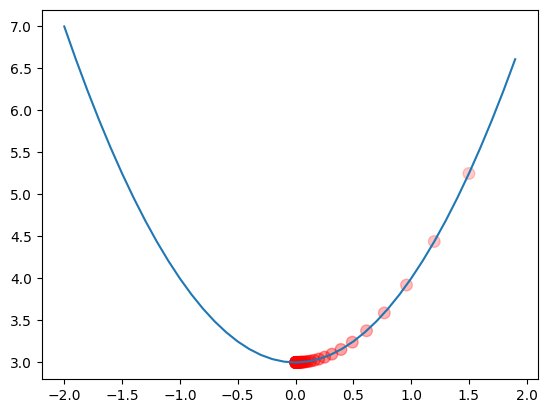

In [ ]:
x = np.arange(-2,2,0.1)
y = x ** 2 + 3

plt.plot(x, y)
plt.scatter(history_x, history_y, color='red', s=70, alpha=np.linspace(0.2,1,Epochs))
plt.show()

We see that $x=0$ and $y=3$ are minima.

This optimization is implemented in optim.
SGD for stochastic gradient descent, and adam, a common optimization method used in deep learning, is also implemented in optim.adam. Pytorch provides the following "optimizer" classes in the torch.optim package.

`adam`, `SGD` are relatively popular optimizers.



In [ ]:
import torch
import torch.optim as optim

x = torch.tensor(-1.5, requires_grad=True)

# use SGD
#opt = optim.SGD([x], lr=0.1)

# use adam
opt = optim.Adam([x], lr=0.1)

Epochs = 100

history_x = torch.zeros(Epochs)
history_y = torch.zeros(Epochs)
for epoch in range(Epochs):

  # 1. forward
  y = x**2+3

  history_x[epoch] = x.item() # get scalar value using item()
  history_y[epoch] = y.item()

  # 2. backward

  y.backward()

  # 3. update(optimization of pameter)
  opt.step()

  # clear grad
  opt.zero_grad()



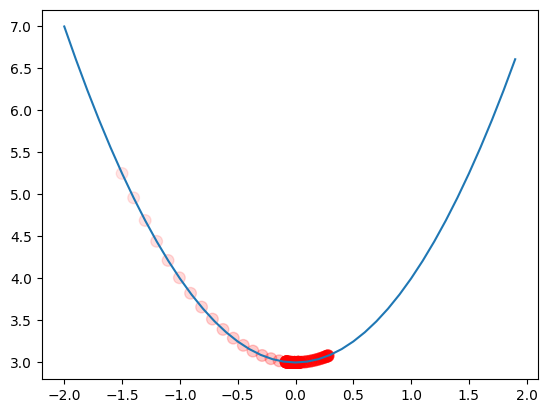

In [ ]:
import numpy as np
x = np.arange(-2,2,0.1)
y = x ** 2 + 3

plt.plot(x, y)
plt.scatter(history_x, history_y, color='red', s=70, alpha=np.linspace(0.1,1,Epochs))
plt.show()

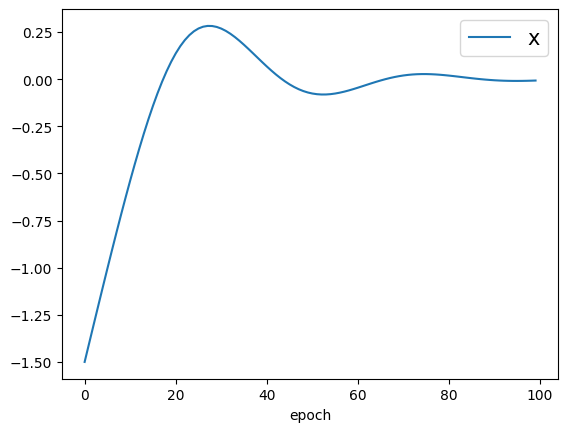

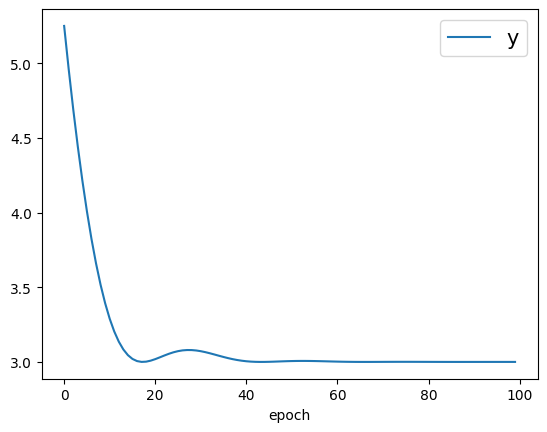

In [ ]:
plt.plot(history_x)
plt.legend(['x'], fontsize=15)
plt.xlabel('epoch')
plt.show()
plt.plot(history_y)
plt.legend(['y'], fontsize=15)
plt.xlabel('epoch')
plt.show()

As a note, depending on the initial values, it may fall into a **locally optimization**, as shown in the figure.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=12PVg4WY33eCx5ine2Kp_CoPGdCNd5Wm6" width="80%">
**Figure 4 optimization**

</div>

It is difficult to fundamentally solve this problem, but some ways to alleviate it are

- Calculate with several different initial values and look for a wide range of minima.

- **Use other optimization methods such as stochastic gradient descent (SGD)**.

Other optimization methods such as **SGD (stochastic gradient descent)** can be used.

<font size=8> Summary </font>

The optimization consists of 4 parts.

1. **Define optimizer.** Define what to train and how to train using `optimizer`.

Loop the following steps until a spefcific Epoch number,

2. **Forward.** Calculate f(x) whatever you want to minimize.

1. **Backward.** calculate the radient values use `backward` to the calculated f(x) in the previous step.

1. **Update parameter**. Update the learning parameters using `optim.steps()` and clear the gradient values using `optim.zero_grad()`.

### <font color='crimson'>**[Practice 2]Find best $\hat{\beta}$** (remained)</font>

We create $y$ and $x$ based on a regression form $y=\beta x$ using the true value of $\beta=1.5$.(We ignore error term for simplicity).

Optimize the $\hat{\beta}$ based on the X and y, which can minimize the MSE loss.

<details>

<summary> Hint 1 - What to minimize? </summary>

- You need to minimize the MSE loss between $y$ and $\hat{y}$, where  $\hat{y}= \hat{\beta}\cdot x$

</details>

<details>
<summary> Hint 2 - Loss function </summary>

$$
loss = \frac{1}{n}\sum_{j=1}^n(y_j - \hat{y_j})^2
$$

</details>

<details>
<summary> Hint 3 - Whole Process </summary>

1. You need to set the opitimizer as optim = optimizer.adam(b, lr=0.1). You can modify the optimizer or lr if you want.

1. In forward process, you need to calculate $\hat{y}$ first. `y_hat=...` based on the current $\hat{\beta}$.

1. Then you need to calculate loss by using $y$ and $\hat{y}$.


1. Then move to the backward part, you need to use backward for the loss function.

1. Others are the same as the example above.

</details>

In [ ]:
grand_beta = 1.5

torch.manual_seed(0)
x = torch.rand(100, 100).view(-1, 1)

y = grand_beta * x


In [ ]:
y

tensor([[0.7444],
        [1.1523],
        [0.1327],
        ...,
        [0.3784],
        [0.5998],
        [1.4703]])

In [ ]:
x

tensor([[0.4963],
        [0.7682],
        [0.0885],
        ...,
        [0.2523],
        [0.3998],
        [0.9802]])

In [ ]:
# beta_hat is your training coefficient
beta_hat = torch.tensor(20., requires_grad=True)

# Start here


import torch
import torch.optim as optim

# use SGD
#opt = optim.SGD([x], lr=0.1)

# use adam
opt = optim.Adam([beta_hat], lr=0.1)

Epochs = 1000

history_x = torch.zeros(Epochs)
history_y = torch.zeros(Epochs)
for epoch in range(Epochs):

  # 1. forward
  y_hat = x * beta_hat
  loss = ((y - y_hat) ** 2).mean()


  history_x[epoch] = beta_hat.item() # get scalar value using item()
  history_y[epoch] = loss.item()

  # 2. backward

  loss.backward()

  # 3. update(optimization of pameter)
  opt.step()

  # clear grad
  opt.zero_grad()



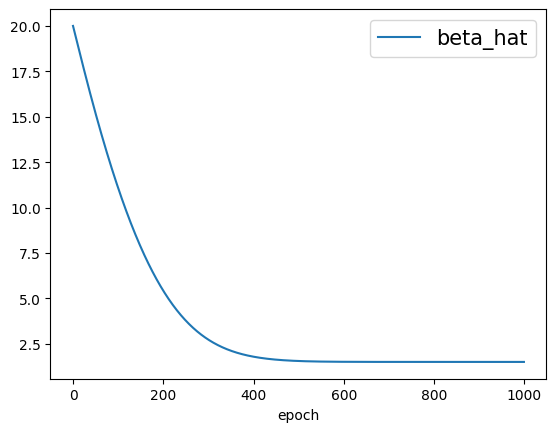

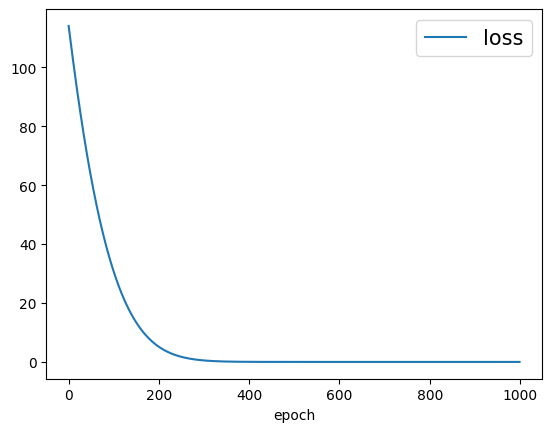

In [ ]:
plt.plot(history_x)
plt.legend(['beta_hat'], fontsize=15)
plt.xlabel('epoch')
plt.show()
plt.plot(history_y)
plt.legend(['loss'], fontsize=15)
plt.xlabel('epoch')
plt.show()

In [ ]:
print(history_x)

tensor([20.0000, 19.9000, 19.8000, 19.7001, 19.6001, 19.5002, 19.4004, 19.3006,
        19.2010, 19.1013, 19.0018, 18.9024, 18.8031, 18.7039, 18.6048, 18.5059,
        18.4071, 18.3085, 18.2101, 18.1118, 18.0136, 17.9157, 17.8180, 17.7204,
        17.6231, 17.5260, 17.4291, 17.3324, 17.2359, 17.1397, 17.0437, 16.9480,
        16.8525, 16.7573, 16.6623, 16.5676, 16.4732, 16.3790, 16.2851, 16.1915,
        16.0982, 16.0051, 15.9123, 15.8199, 15.7277, 15.6358, 15.5442, 15.4529,
        15.3619, 15.2712, 15.1808, 15.0908, 15.0010, 14.9116, 14.8224, 14.7336,
        14.6451, 14.5569, 14.4690, 14.3815, 14.2942, 14.2073, 14.1207, 14.0345,
        13.9485, 13.8629, 13.7776, 13.6926, 13.6080, 13.5237, 13.4397, 13.3561,
        13.2728, 13.1898, 13.1071, 13.0248, 12.9429, 12.8612, 12.7799, 12.6989,
        12.6183, 12.5380, 12.4580, 12.3784, 12.2991, 12.2202, 12.1416, 12.0633,
        11.9854, 11.9078, 11.8305, 11.7536, 11.6771, 11.6009, 11.5250, 11.4495,
        11.3743, 11.2994, 11.2249, 11.15

In [ ]:
history_y

tensor([1.1403e+02, 1.1280e+02, 1.1158e+02, 1.1036e+02, 1.0915e+02, 1.0795e+02,
        1.0676e+02, 1.0557e+02, 1.0439e+02, 1.0322e+02, 1.0206e+02, 1.0090e+02,
        9.9752e+01, 9.8612e+01, 9.7480e+01, 9.6355e+01, 9.5239e+01, 9.4131e+01,
        9.3032e+01, 9.1941e+01, 9.0858e+01, 8.9783e+01, 8.8717e+01, 8.7660e+01,
        8.6611e+01, 8.5571e+01, 8.4539e+01, 8.3516e+01, 8.2501e+01, 8.1495e+01,
        8.0498e+01, 7.9510e+01, 7.8530e+01, 7.7559e+01, 7.6596e+01, 7.5642e+01,
        7.4697e+01, 7.3760e+01, 7.2832e+01, 7.1913e+01, 7.1002e+01, 7.0100e+01,
        6.9206e+01, 6.8321e+01, 6.7444e+01, 6.6576e+01, 6.5716e+01, 6.4864e+01,
        6.4021e+01, 6.3186e+01, 6.2359e+01, 6.1541e+01, 6.0731e+01, 5.9929e+01,
        5.9135e+01, 5.8349e+01, 5.7571e+01, 5.6801e+01, 5.6039e+01, 5.5285e+01,
        5.4539e+01, 5.3800e+01, 5.3069e+01, 5.2346e+01, 5.1631e+01, 5.0923e+01,
        5.0223e+01, 4.9530e+01, 4.8845e+01, 4.8167e+01, 4.7497e+01, 4.6834e+01,
        4.6178e+01, 4.5529e+01, 4.4888e+